In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('Lab2_Data/DF2')

print(data)
sns.pairplot(data)

      Unnamed: 0         0         1
0              0  1.038502  0.835053
1              1  0.320455  0.149079
2              2  0.055480  0.271672
3              3 -0.007260 -0.126550
4              4 -1.237390 -1.049932
...          ...       ...       ...
9995        9995 -0.632309 -0.797517
9996        9996  0.679417  0.526470
9997        9997  0.890697  1.072751
9998        9998  0.475293  0.536909
9999        9999  1.207406  1.230797

[10000 rows x 3 columns]


For this question we must figure out which outlier is 'more-outlying.' The way we are going to do this is by a transformation. By what exact transformation though? Well we need to know a bit about our features first
1. Feature 0
    - Standard (0 mean, 1 var) Gaussian-like distribution with a near perfect covariance with feature 1\n
2. Feature 1
    - Standard (0 mean, 1 var) Gaussian-like distribution with a near perfect covariance with feature 0\n


## Finding the Transformation Matrix

Let us assume that our random variable $z$ is a gaussian, sampled form our data. After observation of $z$ we can say that there is some transformation, $Q$, on a standard gaussian, $y$, such that $z = Qy$. Perhaps we would like to know what the trasnformation was. 

$$cov(z) = zz^T$$
$$cov(z) = (Qy)(Qy)^T$$
$$cov(z) = E_y[(Qy)(Qy)^T]$$
$$cov(z) = Q E_y[yy^T] Q^T$$
$$cov(z) = QIQ^T$$

Now that we have found out a way to get Q, we must figure out what transformation to apply to our gaussian $z$ to return it to a standard gaussian. This will allow us to see how much the outliers truly deviate. 

$$w = AQy$$
$$cov(w) = E_y[AQyy^TQ^TA^T] = I$$
$$ AQE_y[yy^T]Q^TA^T = I$$
$$ AQQ^TA^T = I $$
Here we need to use some linear algebra...
$$ QQ^T = cov(z) = M, AA^T = N$$
$$ MN = I $$
$$ N = M^-1 $$ 
$$ A^T = cholesky(N) $$

We have now found our transformation matrix A...Once applied to our original data, we should see how one outlier is worse than the other.

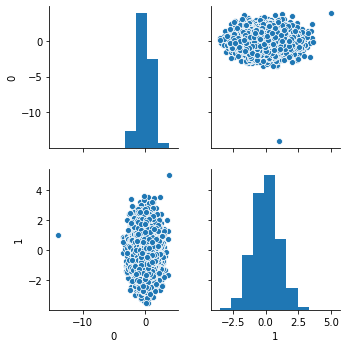

In [2]:
from scipy import linalg
from numpy.linalg import inv

z = data[['0','1']]
cov_z = np.cov(np.transpose(z))

inv_cov_z = inv(cov_z)
I = np.matmul(inv_cov_z,cov_z)

A = linalg.cholesky(inv_cov_z)
w = np.matmul(z, np.transpose(A))

sns.pairplot(w)

In [3]:
outlier_1 = np.array([-1,1])
outlier_2 = np.array([5.5,5])

transformed_outlier_1 = np.matmul(outlier_1, np.transpose(A))
transformed_outlier_2 = np.matmul(outlier_2, np.transpose(A))

print(transformed_outlier_1)
print(transformed_outlier_2)

[-13.99392155   0.99792665]
[3.86307199 4.98963323]
